### S12 vs depth in some frequency window


 ### Mohammad recipe for converting S21 to RVEL

In [1]:
import skrf as rf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.ndimage import gaussian_filter1d
import os
import glob
from NuRadioReco.utilities import units

In [2]:
# display plots in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# rf.stylely()

In [3]:
# grab all files from both directories
HPol_path = 'Data/Port1inNWhole_Port2inShole_ST35_HPOL_VNA'
VPol_path = 'Data/Port1inNWhole_Port2inShole_ST35_VPOL_VNA'
s2p_files_HPol = glob.glob(os.path.join(HPol_path, '*.s2p'))
s2p_files_VPol = glob.glob(os.path.join(VPol_path, '*.s2p'))
# Load all s2p files into a single list of Network objects
networks = [rf.Network(file) for file in s2p_files_HPol + s2p_files_VPol]
networks = sorted(networks, key=lambda x: (x.name[:-2], int(x.name[-2:]) if x.name[-2:].isdigit() else float('inf')))

# format the names so that the last 3 characters are the depth with leading zeros
for network in networks:
    if network.name[-3] == '_':
        network.name = network.name[:-3] + '_0' + network.name[-2:]  # add leading zero to single digit depths
    print(f"network name: {network.name}")


network name: Aug4_hpol_down_01m
network name: Aug4_hpol_down_02m
network name: Aug4_hpol_down_03m
network name: Aug4_hpol_down_04m
network name: Aug4_hpol_down_05m
network name: Aug4_hpol_down_06m
network name: Aug4_hpol_down_07m
network name: Aug4_hpol_down_08m
network name: Aug4_hpol_down_09m
network name: Aug4_hpol_down_10m
network name: Aug4_hpol_down_11m
network name: Aug4_hpol_down_12m
network name: Aug4_hpol_down_13m
network name: Aug4_hpol_down_14m
network name: Aug4_hpol_down_15m
network name: Aug4_hpol_down_16m
network name: Aug4_hpol_down_17m
network name: Aug4_hpol_down_18m
network name: Aug4_hpol_down_19m
network name: Aug4_hpol_down_20m
network name: Aug4_hpol_down_21m
network name: Aug4_hpol_down_22m
network name: Aug4_hpol_down_23m
network name: Aug4_hpol_down_24m
network name: Aug4_hpol_down_25m
network name: Aug4_hpol_down_26m
network name: Aug4_hpol_down_27m
network name: Aug4_hpol_down_28m
network name: Aug4_hpol_down_29m
network name: Aug4_hpol_down_30m
network na

In [4]:
ff = np.linspace(50 * units.MHz, 1 * units.GHz, 1000)

num_networks = len(networks)
print(f'Number of networks: {num_networks}')

hpol_down_networks = [net for net in networks if 'hpol_down' in net.name]
hpol_up_networks = [net for net in networks if 'hpol_up' in net.name]
vpol_networks = [net for net in networks if 'vpol' in net.name]

# make an array of the networks that are hpol down, their name, wavelength, Gain, and RVEL
hpol_down = []
sigma = 5

for i, net in enumerate(hpol_down_networks):
    # print(f'Plotting for {net.name}')
    wavelength = 3e8 / net.f
    S_12 = np.abs(net.s[:, 1, 0])
    smoothed_S_12 = gaussian_filter1d(S_12, sigma=sigma)
    hpol_down.append({
        'name': net.name,
        'frequency': net.f,
        'wavelength': wavelength,
        'S_12': S_12,
        'smoothed_S_12': smoothed_S_12,
    })

hpol_up = []
for i, net in enumerate(hpol_up_networks):
    wavelength = 3e8 / net.f
    S_12 = np.abs(net.s[:, 1, 0])
    smoothed_S_12 = gaussian_filter1d(S_12, sigma=sigma)
    hpol_up.append({
        'name': net.name,
        'frequency': net.f,
        'wavelength': wavelength,
        'S_12': S_12,
        'smoothed_S_12': smoothed_S_12,
    })

vpol = []
for i, net in enumerate(vpol_networks):
    wavelength = 3e8 / net.f
    S_12 = np.abs(net.s[:, 1, 0])
    smoothed_S_12 = gaussian_filter1d(S_12, sigma=sigma)
    vpol.append({
        'name': net.name,
        'frequency': net.f,
        'wavelength': wavelength,
        'S_12': S_12,
        'smoothed_S_12': smoothed_S_12,
    })

Number of networks: 99


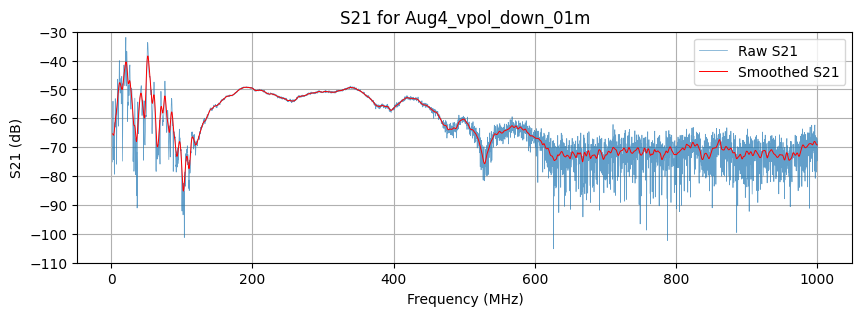

In [5]:
# plot the first hpol down network S21 as an example
plt.figure(figsize=(10, 3))
# plt.plot(hpol_down[0]['frequency'] / 1e6, 20 * np.log10(hpol_down[0]['S_12']), label='Raw S21', alpha= 0.7, linewidth= 0.5)
# plt.plot(hpol_down[0]['frequency'] / 1e6, 20 * np.log10(hpol_down[0]['smoothed_S_12']), label='Smoothed S21', color='red', linewidth= 0.7)
plt.plot(vpol[0]['frequency'] / 1e6, 20 * np.log10(vpol[0]['S_12']), label='Raw S21', alpha=0.7, linewidth=0.5)
plt.plot(vpol[0]['frequency'] / 1e6, 20 * np.log10(vpol[0]['smoothed_S_12']), label='Smoothed S21', color='red', linewidth=0.7)

plt.xlabel('Frequency (MHz)')
plt.ylabel('S21 (dB)')
plt.title(f"S21 for {vpol[0]['name']}")
plt.ylim(-110, -30)
plt.grid()
plt.legend()


In [6]:
update = True
update = False

In [7]:
# plot each of the networks in the network list in a column of subplots
network_list = hpol_down
# network_list = hpol_up
# network_list = vpol
dir = 'My S12'
if update:
    fig, axs = plt.subplots(len(network_list), 1, figsize=(10, 3 * len(network_list)), sharex=True)
    for i, net in enumerate(network_list):
        name = net['name'][5:]  # remove the Aug4_ part of the name
        axs[i].plot(net['frequency'] / 1e6, 20 * np.log10(net['S_12']), label='Raw S21', alpha=0.7, linewidth=0.5)
        axs[i].plot(net['frequency'] / 1e6, 20 * np.log10(net['smoothed_S_12']), label='Smoothed S21', color='red', linewidth=0.7)
        axs[i].set_ylabel('S21 (dB)')
        axs[i].set_title(f"S21 for {name}")
        # if 'hpol' in name:
        axs[i].set_ylim(-110, -30)

        axs[i].xaxis.set_major_locator(plt.MultipleLocator(100))
        axs[i].set_xlim(0, 1000)
        # draw the x axis numerical labels in each subplot
        axs[i].set_xlabel('Frequency (Hz)')
        axs[i].tick_params(axis='x', which='both', labelbottom=True)
        axs[i].grid()
        if i == 0:
            axs[i].legend()
    axs[-1].set_xlabel('Frequency (MHz)')
    plt.tight_layout()
    plt.savefig(f'{dir}/all {name[:-4]}_S12.pdf', dpi=300, bbox_inches='tight')
    plt.close()

In [8]:
# calculate the area under the S21 curve in the frequency range 200-300 MHz
def calculate_area(network_list, f_start, f_end):
    """ Calculate the area under the S21 curve in the frequency range f_start to f_end """
    areas = []
    for net in network_list:
        # print(net['name'])
        freq = net['frequency']
        S_12 = net['S_12']
        # find the indices of the frequency range
        idx_start = np.searchsorted(freq, f_start)
        idx_end = np.searchsorted(freq, f_end)
        # calculate the area using the trapezoidal rule
        area = np.trapezoid(S_12[idx_start:idx_end], freq[idx_start:idx_end])
        areas.append(area)
    return areas


In [9]:
f_start = 200e6
f_end = 500e6
# print(network_list)
areas = calculate_area(network_list, f_start, f_end)
ave_mag = [area / (f_end - f_start) for area in areas]
ave_mag_db = [20 * np.log10(mag) for mag in ave_mag]

NameError: name 'name' is not defined

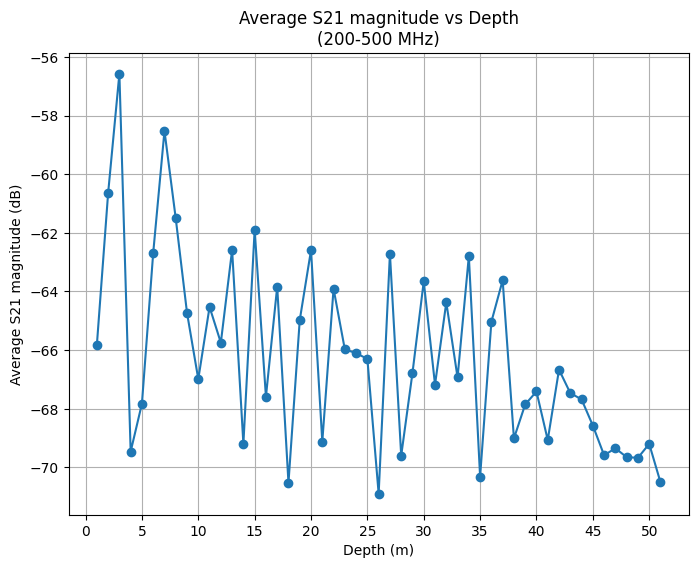

In [10]:
# plot the areas vs depth
depths = [int(net['name'][-3:-1]) for net in network_list]
plt.figure(figsize=(8, 6))
# plt.plot(depths, areas, marker='o', linestyle='-')
# plt.plot(depths, ave_mag, marker='o', linestyle='-')
plt.plot(depths, ave_mag_db, marker='o', linestyle='-')
plt.xlabel('Depth (m)')
# x ticks every 5
plt.xticks(np.arange(0, max(depths), 5))
plt.ylabel('Average S21 magnitude (dB)')
plt.title('Average S21 magnitude vs Depth\n(200-500 MHz)')
plt.grid()
plt.savefig(f'{dir}/1. Area_under_S21_curve_vs_depth_{f_start/1e6}-{f_end/1e6}MHz_{name[:-4]}.png', dpi=300, bbox_inches='tight')
plt.show()

In [107]:
# TODO:
# - plot S21 from pulser data
# - look at s11 to see how it migrates with depth
#   - same as S21?